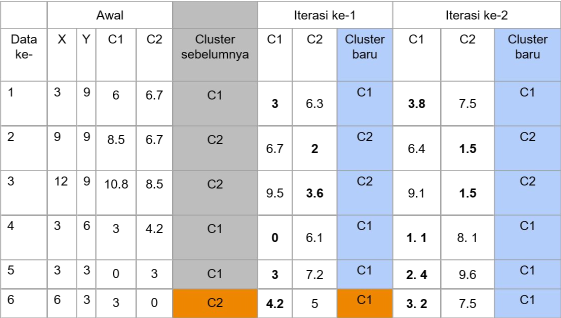

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

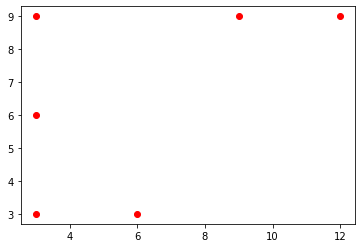

In [ ]:
X = np.array([[3,9],[9,9],[12,9],[3,6],[3,3],[6,3]])
plt.plot(pd.DataFrame(X).iloc[:,0], pd.DataFrame(X).iloc[:,1], 'ro')
plt.show()

In [ ]:
pd.DataFrame(X)

,0,1
0,3,9
1,9,9
2,12,9
3,3,6
4,3,3
5,6,3


In [ ]:
for n_iter in range(1,100):
  # kmeans = KMeans(n_clusters = 2, init=np.array([[3,3],[6,3]]), max_iter=n_iter)
  kmeans = KMeans(n_clusters = 2, init='k-means++', max_iter=n_iter, random_state=31)
  kmeans.fit(X)
  # print(f'Banyak iterasi = {n_iter}\n\n')
  # print('Centroid')
  # print(kmeans.cluster_centers_)
  # print('--'*20)
  # print('Label')
  print(kmeans.labels_)
  # print('--'*50)

[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0 1 1 1]
[1 0 0

In [ ]:
df = pd.DataFrame(X)
df['label'] = kmeans.labels_
df

,0,1,label
0,3,9,1
1,9,9,0
2,12,9,0
3,3,6,1
4,3,3,1
5,6,3,1


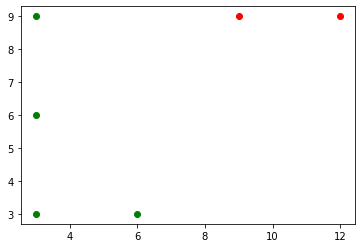

In [ ]:
plt.plot(df[df.label==0].iloc[:,0],df[df.label==0].iloc[:,1],'ro')
plt.plot(df[df.label==1].iloc[:,0],df[df.label==1].iloc[:,1],'go')

In [ ]:
from sklearn.metrics import silhouette_score

from silhouette_score(X, kmeans.labels_)

0.5176627821748618

In [ ]:
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('Mall_Customers.csv')
df2 = df2[['AnnualIncome', 'SpendingScore']]

scaler = StandardScaler()
ndf2 = scaler.fit_transform(df2)
ndf2 = pd.DataFrame(ndf2)

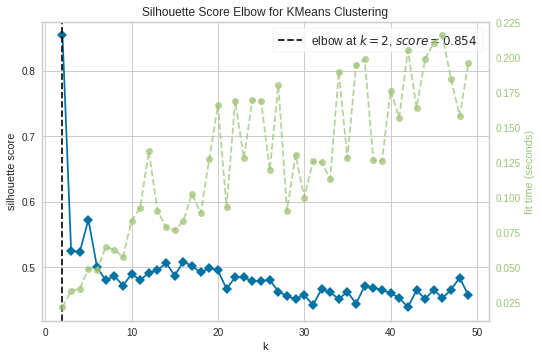

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
viz = KElbowVisualizer(model, k=(2,50), metric='silhouette')
viz.fit(ndf2)
viz.show()

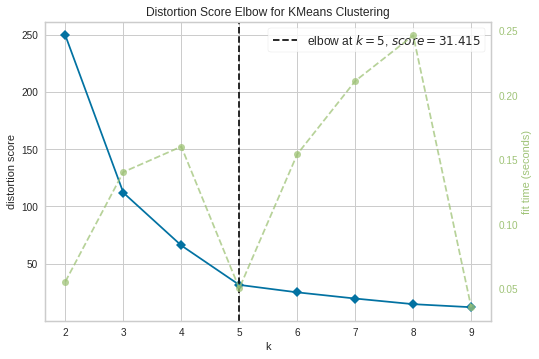

In [ ]:
model = KMeans()
viz = KElbowVisualizer(model, k=(2,10), metric='distortion')
viz.fit(ndf2)
viz.show()

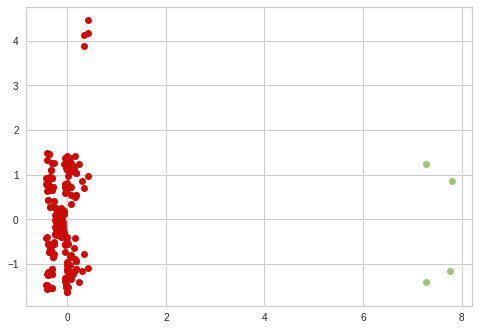

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=32)
kmeans2.fit(ndf2)
ndf2['label_kmeans2'] = kmeans2.labels_

plt.plot(ndf2[ndf2.label_kmeans2==0].iloc[:,0], ndf2[ndf2.label_kmeans2==0].iloc[:,1], 'ro')
plt.plot(ndf2[ndf2.label_kmeans2==1].iloc[:,0], ndf2[ndf2.label_kmeans2==1].iloc[:,1], 'go')

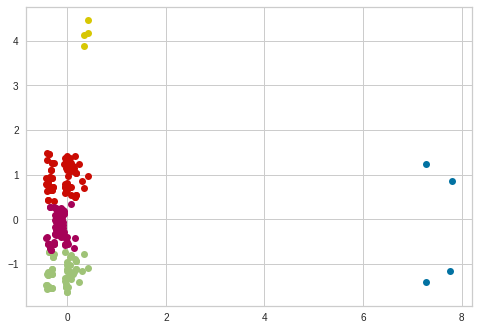

In [ ]:
kmeans5 = KMeans(n_clusters=5, random_state=32)
kmeans5.fit(ndf2)
ndf2['label_kmeans5'] = kmeans5.labels_

color = ['ro','go','bo','mo','yo']

for i in range(len(color)):
  plt.plot(ndf2[ndf2.label_kmeans5==i].iloc[:,0], ndf2[ndf2.label_kmeans5==i].iloc[:,1], color[i])
plt.show()
# plt.plot(ndf2[ndf2.label_kmeans5==1].iloc[:,0], ndf2[ndf2.label_kmeans5==1].iloc[:,1], 'go')

In [ ]:
len(kmeans2.labels_)

240

In [ ]:
ndf2.shape

(240, 2)